<a href="https://colab.research.google.com/github/basangoudapatil/Natural_language_Processing-project/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of US airlines Users based on twitter Data

# 1. Import Necessary Libraries.
# 2. Read the Data and explore.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

I am droping cloumns which have null values high in number, tweet_id and other columns which make no significance.

In [ ]:
lst = ['tweet_id', 'airline_sentiment_confidence','negativereason','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_location','user_timezone']
df = df.drop(lst, axis = 1)
df.head()

,airline_sentiment,airline,text,tweet_created
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


# 3. Data Pre-Processing
a.   Remove Punctuation

b.   Replace short words

c.   Making text lower case

d.   Remove stopwords

e.   Lemmatization

**Removing Punctuations (.!<>{}'",(/)-)**

In [ ]:
df['text_processed'] = df['text'].str.replace("[^a-zA-Z0-9]"," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,airline_sentiment,airline,text,tweet_created,text_processed
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,VirginAmerica What dhepburn said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,VirginAmerica plus you ve added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,VirginAmerica I didn t today Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,VirginAmerica it s really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,VirginAmerica and it s a really big bad thing...


**Replacing Short Words**

In [ ]:
df['text_processed'] = df['text_processed'].apply(lambda x: ' '.join([i for i in x.split() if len(i)>2]))

**Changing to Lower Case**

In [ ]:
df['text_processed'] = [sent.lower() for sent in df['text_processed']]

**Removing Stop-Words**

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed
add_words = ['thanks','jetblue','southwestair','united','thank','flight','americanair','usaairways','get','great','http','service','love','virginamerica','fly','make','customer','good','guy','help','time','much','airline','best','awesome','work','today','appreciate','amp','crew']
#add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making','time','good','watch','character']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['text_processed'] = [remove_stopwords(r) for r in df['text_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,airline_sentiment,airline,text,tweet_created,text_processed
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,dhepburn said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,plus added commercials experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,must mean need take another trip
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,really aggressive blast obnoxious entertainmen...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,really big bad thing


**Lemmatization**

1) split sentence into words

2) get the detailed POS for each word

3) get shallow POS from detailed POS

4) do lemmatisation for each word

5) join all the words to form sentence 

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['text_processed'] = df['text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 4. Plotting Frequent Words

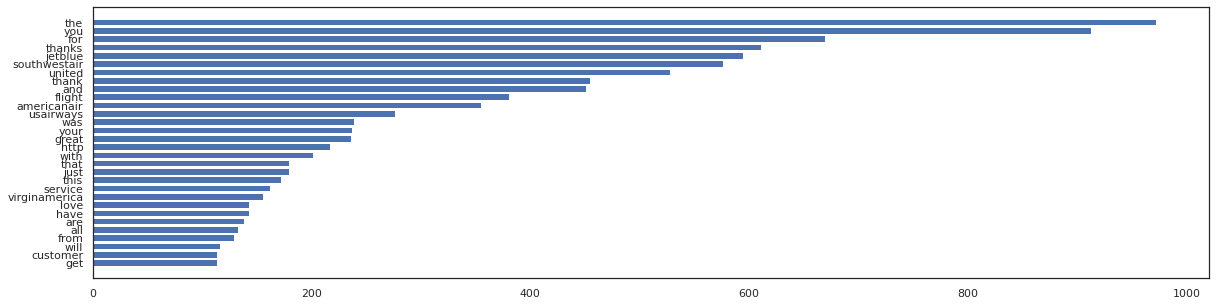

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['airline_sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# 5.Modelling

**Bag of Words**

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.text_processed).toarray()
y = df.airline_sentiment.map({'positive' : 1, 'neutral' : 0, 'negative': -1}).values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((11712, 2500), (2928, 2500))

**Building the ML Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred


array([ 1, -1, -1, ...,  1, -1,  0])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6616308939413426

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[1503  208  149]
 [ 218  248  128]
 [ 187   92  195]]
The model accuracy is 0.6646174863387978


Models accuracy score and f1-score are almost the same and > 0.5, the predictions of the model is a goodfit.

**Feature Importances**

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
1018,0.029590,usairways
488,0.026378,hour
166,0.013965,cancel
283,0.011600,delay
165,0.009844,call
...,...,...
490,0.000026,hpn
663,0.000026,nicely
113,0.000024,beach
194,0.000007,cheer
